### Laboratorio 1 por César Rodríguez

# Problema 1

In [1]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import numpy as np

In [28]:
from PIL import Image
import cv2

def activar_canales_color(imagen, color):
    # Convertir la imagen de OpenCV (BGR) a formato RGB (necesario para PIL)
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    img = Image.fromarray(imagen_rgb)

    # Obtener los canales de la imagen
    red, green, blue = img.split()

    # Crea una imagen en blanco con un solo canal de color
    blank_channel = Image.new('L', img.size, 0)

    # Activa el canal de color correspondiente
    if color == 1:
        img = Image.merge('RGB', (blank_channel, blank_channel, blue))
    elif color == 2:
        img = Image.merge('RGB', (blank_channel, green, blank_channel))
    elif color == 3:
        img = Image.merge('RGB', (red, blank_channel, blank_channel))
    elif color == 10:
        img = Image.merge('RGB', (red, green, blank_channel))
    elif color == 20:
        img = Image.merge('RGB', (blank_channel, green, blue))
    elif color == 30:
        img = Image.merge('RGB', (red, blank_channel, blue))

    return img

# Cargar la imagen con OpenCV
img = cv2.imread("image.jpg")

# Obtener la imagen con los canales activos
imagen_con_canales_activos = activar_canales_color(img, 10)



# Problema 2

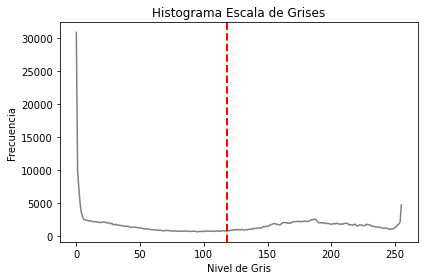

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def mostrar_histogramas(imagen):
    # Convertir la imagen a escala de grises si aún no lo es
    if len(imagen.shape) > 2:
        imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    else:
        imagen_gris = imagen

    # Calcular el histograma de la imagen en escala de grises
    hist_gris, _ = np.histogram(imagen_gris.ravel(), bins=256, range=(0, 256))

    # Calcular la media del histograma de escala de grises
    media_gris = np.mean(imagen_gris)

    # Mostrar el histograma de escala de grises con una línea vertical que representa la media
    plt.figure(figsize=(6, 4))
    plt.plot(hist_gris, color='gray')
    plt.axvline(media_gris, color='red', linestyle='dashed', linewidth=2)
    plt.title("Histograma Escala de Grises")
    plt.xlabel("Nivel de Gris")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
# Reemplaza 'ruta_de_la_imagen.jpg' con la ruta de la imagen que desees procesar

imagen = cv2.imread("image.jpg")
mostrar_histogramas(imagen)


# Problema 3

In [30]:
import cv2

def crear_escala_grises_tres_dimensiones(image):
    # Cargar la imagen a color con cv2
    img_color = cv2.imread("image.jpg")

    # Separar los canales de color
    canal_azul, canal_verde, canal_rojo = cv2.split(img_color)

    # Guardar los canales de color como imágenes en escala de grises
    cv2.imwrite("canal_azul.jpg", canal_azul)
    cv2.imwrite("canal_verde.jpg", canal_verde)
    cv2.imwrite("canal_rojo.jpg", canal_rojo)

# Cargar la imagen con OpenCV
img = cv2.imread("image.jpg")

# Obtener la imagen con los canales activos
crear_escala_grises_tres_dimensiones(img)


# Problema 4

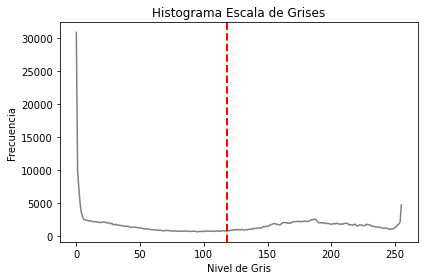

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def mostrar_histogramas(imagen):
    # Convertir la imagen a escala de grises si aún no lo es
    if len(imagen.shape) > 2:
        imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    else:
        imagen_gris = imagen

    # Calcular el histograma de la imagen en escala de grises
    hist_gris, _ = np.histogram(imagen_gris.ravel(), bins=256, range=(0, 256))

    # Calcular la media del histograma de escala de grises
    media_gris = np.mean(imagen_gris)

    # Mostrar el histograma de escala de grises con una línea vertical que representa la media
    plt.figure(figsize=(6, 4))
    plt.plot(hist_gris, color='gray')
    plt.axvline(media_gris, color='red', linestyle='dashed', linewidth=2)
    plt.title("Histograma Escala de Grises")
    plt.xlabel("Nivel de Gris")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

# Cargar la imagen con OpenCV

imagen = cv2.imread("image.jpg")

# Mostrar el histograma de escala de grises de la imagen cargada
mostrar_histogramas(imagen)


# Problema 5

El espacio de color HSV (Hue, Saturation, Value) es un modelo de color que describe los colores en términos de tres componentes principales: matiz (Hue), saturación (Saturation) y valor (Value). Este espacio de color es una forma más intuitiva de representar y manipular colores, ya que se asemeja más a cómo los humanos percibimos y describimos los colores en la vida cotidiana.

- **Matiz (Hue)**: Representa el tono del color. Es un valor angular que varía de 0 a 360 grados. Los 0 grados representan el rojo puro, mientras que los 120 grados representan el verde y los 240 grados el azul.

- **Saturación (Saturation)**: Representa la intensidad o pureza del color. Es un valor que varía de 0 a 1, donde 0 es un color completamente desaturado (gris) y 1 es el color completamente saturado.

- **Valor (Value)**: Representa la luminosidad o brillo del color. Es un valor que varía de 0 a 1, donde 0 es completamente negro y 1 es el color en su máxima luminosidad.

En el espacio de color HSV, el matiz representa la información del color en sí, la saturación representa cuánta presencia tiene ese color y el valor representa la cantidad de luz que tiene el color. Esta representación hace que el espacio de color HSV sea especialmente útil para ciertas tareas de procesamiento de imágenes, como el ajuste de colores, la segmentación de objetos y la detección de bordes.

Para mapear colores a este espacio, se puede utilizar la conversión desde otros espacios de color, como el espacio de color RGB (Red, Green, Blue). La conversión de RGB a HSV se puede realizar mediante fórmulas matemáticas que toman en cuenta las relaciones entre las componentes RGB y HSV. La conversión inversa, de HSV a RGB, también se puede realizar utilizando fórmulas inversas.

Al mapear colores de RGB a HSV, se pueden manipular más fácilmente ciertas características del color, como cambiar el matiz para obtener diferentes tonos del mismo color o ajustar la saturación y el valor para cambiar la intensidad y luminosidad del color. Estas operaciones pueden ser especialmente útiles para aplicar filtros de color, realizar ajustes en imágenes y realizar tareas de visión por computadora donde la percepción del color humano es relevante.